# Comparaison of two policies

In this notebook, we give the possibilty to compare two policies

Given two trained policies, for each policy we will simulate a certain number of rounds against a random policy, and we check if one is significantly better than the other

## Imports

In [1]:
import statsmodels
import pandas as pd
import numpy as np
import scipy.stats as scs

import matplotlib.pyplot as plt

In [2]:
pwd

'/mnt/workspace/coincheRO/gym-coinche/reward_prediction'

In [3]:
random_data = pd.read_csv("./data/random_hands_and_reward.csv").drop("Unnamed: 0", axis = 1)



In [4]:
random_data.shape
random_data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64'],
      dtype='object')

In [6]:
random_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,64
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,108.0
1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0
2,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,55.0
3,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0


In [7]:
random_data = pd.read_csv("./data/random_hands_and_reward.csv", index_col=0)

suit = ["atout", "na1", "na2", "na3"]
cards = ["7", "8", "9", "10", "jack", "queen", "king", "as"]
players = ["p1", "p2"]
random_data.columns = [(suit*2)[x//8]+"_"+cards[x%8]+"_"+players[x//32] for x in range(64)] + ["total_reward"]
random_attack = pd.read_csv("./data/random_attacker_teams.csv").drop("Unnamed: 0", axis = 1)

In [8]:
random_data.head()

,atout_7_p1,atout_8_p1,atout_9_p1,atout_10_p1,atout_jack_p1,atout_queen_p1,atout_king_p1,atout_as_p1,na1_7_p1,na1_8_p1,...,na2_as_p2,na3_7_p2,na3_8_p2,na3_9_p2,na3_10_p2,na3_jack_p2,na3_queen_p2,na3_king_p2,na3_as_p2,total_reward
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,108.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,55.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0


In [9]:
random_data.shape, random_attack.shape

((1000, 65), (1000, 4))

In [10]:
random_data = random_data.merge(random_attack, right_index = True,
                               left_index = True)

random_data.head()

,atout_7_p1,atout_8_p1,atout_9_p1,atout_10_p1,atout_jack_p1,atout_queen_p1,atout_king_p1,atout_as_p1,na1_7_p1,na1_8_p1,...,na3_10_p2,na3_jack_p2,na3_queen_p2,na3_king_p2,na3_as_p2,total_reward,p0,p1,p2,p3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,108.0,0,1,0,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,117.0,1,0,1,0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,55.0,1,0,1,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,105.0,0,1,0,1


## Sizing the test

In a first approach, we are making an A/B test. So we need to to have an estimation of the size of the samples that will be needed

count    1000.000000
mean       82.535000
std        34.816447
min         0.000000
25%        57.000000
50%        83.000000
75%       107.000000
max       162.000000
Name: total_reward, dtype: float64


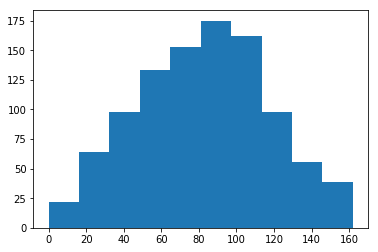

In [11]:
plt.hist(random_data["total_reward"])
print(random_data["total_reward"].describe())

In [12]:
# We want to be able to detect one point of difference of total reward for the attack, and one point for defense
mde = 1
risk1 = 0.05
risk2 = 0.2

# under a random policy, the distribution is centered in 82 with std of 35
std = 35

In [13]:
def size_sample_AB_test(risk1, risk2, var, mde, bilateral=False):

    if bilateral:
        Z_alpha = scs.norm(0, 1).ppf(1 - risk1/2)
    else:
        Z_alpha = scs.norm(0, 1).ppf(1 - risk1)

    Z_beta = scs.norm(0, 1).ppf(1 - risk2)

    min_N = (2*(var)*(Z_beta + Z_alpha)**2 / mde**2)

    return min_N

size_sample_AB_test(risk1, risk2, var = std**2, mde = mde, bilateral=True)

19229.755349155268

We will make the assumption that std is not really moving even with better policies.
Moreover, we'll take a bit bigger samples to be sure (as it doesn't cost anything to do so)

## Comparing policies

In [19]:
competition_data = pd.read_csv("./data/competition_hands_and_reward.csv").drop("Unnamed: 0", axis = 1)

suit = ["atout", "na1", "na2", "na3"]
cards = ["7", "8", "9", "10", "jack", "queen", "king", "as"]
players = ["p1", "p2"]
players2 = ["p3", "p4"]
competition_data.columns = [(suit*2)[x//8]+"_"+cards[x%8]+"_"+players[x//32] for x in range(64)] +\
                        [(suit*2)[x//8]+"_"+cards[x%8]+"_"+players2[x//32] for x in range(64)]+\
                        ["total_reward"]

competition_attack = pd.read_csv("./data/competition_attacker_teams.csv").drop("Unnamed: 0", axis = 1)

In [20]:
competition_data.head()

,atout_7_p1,atout_8_p1,atout_9_p1,atout_10_p1,atout_jack_p1,atout_queen_p1,atout_king_p1,atout_as_p1,na1_7_p1,na1_8_p1,...,na2_as_p4,na3_7_p4,na3_8_p4,na3_9_p4,na3_10_p4,na3_jack_p4,na3_queen_p4,na3_king_p4,na3_as_p4,total_reward
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,152.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,123.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0


In [21]:
competition_data = competition_data.merge(competition_attack, right_index = True,
                               left_index = True)

competition_data.head()

,atout_7_p1,atout_8_p1,atout_9_p1,atout_10_p1,atout_jack_p1,atout_queen_p1,atout_king_p1,atout_as_p1,na1_7_p1,na1_8_p1,...,na3_10_p4,na3_jack_p4,na3_queen_p4,na3_king_p4,na3_as_p4,total_reward,p0,p1,p2,p3
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,117.0,1,0,1,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,47.0,1,0,1,0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,152.0,0,1,0,1
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,123.0,1,0,1,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,91.0,1,0,1,0


In [27]:
competition_data.loc[:,'total_reward_team_02'] = np.where(competition_data['p0']==1, competition_data['total_reward'], 160-competition_data['total_reward']) 
competition_data.loc[:,'total_reward_team_13'] = np.where(competition_data['p1']==1, competition_data['total_reward'], 160-competition_data['total_reward']) 

In [22]:
# Check qu'autant de parties jouées en attaque qu'en défense
competition_data['p0'].value_counts()

0    503
1    497
Name: p0, dtype: int64

In [29]:
attack_02 = competition_data[competition_data['p0']==1]['total_reward_team_02']
defense_02 = competition_data[competition_data['p0']==0]['total_reward_team_02']
attack_13 = competition_data[competition_data['p1']==1]['total_reward_team_13']
defense_13 = competition_data[competition_data['p1']==0]['total_reward_team_13']

In [32]:
attack_02.head()

0    117.0
1     47.0
3    123.0
4     91.0
9     85.0
Name: total_reward_team_02, dtype: float64

In [34]:
def test_H0(x_A, x_B, risk1, bilateral=False):

    # Calcul de t_AB : différence des moyennes normalisée
    diff_mean = (np.mean(x_B) - np.mean(x_A))  # diff entre les moyennes

    # Estimation de l'écart-type joint
    std_pooled = np.sqrt((np.var(x_B)/len(x_B)) + (np.var(x_A)/len(x_A)))
    stat = diff_mean/std_pooled  # différence normalisée

    # Seuil correspondant au risk de première espèce défini
    if bilateral:
        t = scs.norm(0, 1).ppf(1 - risk1/2)
        return np.abs(stat<t), t, stat
    else:
        t = scs.norm(0, 1).ppf(1 - risk1)
        return (stat < t), t, stat

In [35]:
# Attack
test_H0(attack_02, attack_13, risk1, bilateral=True)

(True, 1.959963984540054, -0.45615186365570937)

In [38]:
def power_test(x_A, x_B, mde, risk1, bilateral=False):
    var_A = np.var(x_A)
    var_B = np.var(x_B)
    N_A = len(x_A)
    N_B = len(x_B)
    
    
    std_pooled = np.sqrt(var_A/N_A + var_B/N_B)
    expectation = mde/std_pooled
    t = test_H0(x_A, x_B, risk1, bilateral)[1]

    return (1 - scs.norm(expectation, 1).cdf(t))

In [40]:
power_test(attack_02, attack_13, mde, risk1, bilateral=True)

0.06721340929081021

In [56]:
data_1_path = "./data/policy_1_data.csv"
data_2_path = "./data/policy_2_data.csv"